In [1]:
import pandas as pd
import numpy as np

In [2]:
#import the dataset for analysis
data_part1 = pd.read_csv("C:/Users/pramo/OneDrive/Desktop/Assessment MSc Business Analytics/Data Analytics/A2 data part 1.csv",\
                         encoding='latin1')
data_part2 = pd.read_csv("C:/Users/pramo/OneDrive/Desktop/Assessment MSc Business Analytics/Data Analytics/A2 data part 2.csv",\
                         encoding='latin1')

In [3]:
#merge the two dataset
df= pd.concat([data_part1, data_part2], ignore_index=True)

In [4]:
# Summary statistics
print(df.describe(include='all'))

        Invoice StockCode                         Description      Quantity  \
count   1067371   1067371                             1062989  1.067343e+06   
unique    53628      5305                                5698           NaN   
top      537434    85123A  WHITE HANGING HEART T-LIGHT HOLDER           NaN   
freq       1350      5829                                5918           NaN   
mean        NaN       NaN                                 NaN  9.938964e+00   
std         NaN       NaN                                 NaN  1.727080e+02   
min         NaN       NaN                                 NaN -8.099500e+04   
25%         NaN       NaN                                 NaN  1.000000e+00   
50%         NaN       NaN                                 NaN  3.000000e+00   
75%         NaN       NaN                                 NaN  1.000000e+01   
max         NaN       NaN                                 NaN  8.099500e+04   

             InvoiceDate         Price    Customer 

In [5]:
#Checking for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Checking data types and missing values
print(df.info())

# Checking for missing values in each column
print(" Missing values in each column:")
print(df.isnull().sum())

Number of duplicate rows: 34324
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067343 non-null  float64
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067340 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(3), object(5)
memory usage: 65.1+ MB
None
 Missing values in each column:
Invoice             0
StockCode           0
Description      4382
Quantity           28
InvoiceDate         0
Price              31
Customer ID    243007
Country             0
dtype: int64


In [6]:
# Removing duplicate rows in the same DataFrame
df = df.drop_duplicates()

# Verifying that duplicates are removed
duplicate_rows_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_rows_after}")

Number of duplicate rows after removal: 0


In [7]:
# Replace missing values in 'Price' with the median
df['Price'] = df['Price'].fillna(df['Price'].median())

# Replace missing values in 'Quantity' with the median
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())

# Replace missing values in 'Customer ID' with 'Unknown'
df['Customer ID'] = df['Customer ID'].fillna('Unknown')

# Replace missing values in 'Description' with 'Not Known'
df['Description'] = df['Description'].fillna('Not Known')

# Verify missing values have been handled
print(df.isnull().sum())


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [8]:
# Display the number of unique values in each column
unique_values = df.nunique()

# Print the result
print("Number of unique values in each column:")
print(unique_values)

Number of unique values in each column:
Invoice        53628
StockCode       5305
Description     5699
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5943
Country           43
dtype: int64


In [9]:
# Identify rows with negative Quantity values
negative_quantity_rows = df[df['Quantity'] < 0]

# Display the rows with negative Quantity (optional, to verify)
print(negative_quantity_rows)

# Identify rows with negative Price values
negative_price_rows = df[df['Price'] < 0]

# Display the rows with negative price (optional, to verify)
print(negative_price_rows)

         Invoice StockCode                       Description  Quantity  \
178      C489449     22087          PAPER BUNTING WHITE LACE     -12.0   
179      C489449    85206A      CREAM FELT EASTER EGG BASKET      -6.0   
180      C489449     21895     POTTING SHED SOW 'N' GROW SET      -4.0   
181      C489449     21896                POTTING SHED TWINE      -6.0   
182      C489449     22083        PAPER CHAIN KIT RETRO SPOT     -12.0   
...          ...       ...                               ...       ...   
1065910  C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL     -11.0   
1067002  C581499         M                            Manual      -1.0   
1067176  C581568     21258        VICTORIAN SEWING BOX LARGE      -5.0   
1067177  C581569     84978  HANGING HEART JAR T-LIGHT HOLDER      -1.0   
1067178  C581569     20979     36 PENCILS TUBE RED RETROSPOT      -5.0   

              InvoiceDate   Price Customer ID         Country  
178      01/12/2009 10:33    2.95     16321.0  

In [10]:
# Remove rows with negative Quantity
df = df[df['Quantity'] >= 0]

# Remove rows with negative price
df = df[df['Price'] >= 0]

# Check the updated DataFrame
print(df.describe())

           Quantity         Price
count  1.010548e+06  1.010548e+06
mean   1.133622e+01  4.064043e+00
std    1.314645e+02  5.036643e+01
min    1.000000e+00  0.000000e+00
25%    1.000000e+00  1.250000e+00
50%    4.000000e+00  2.100000e+00
75%    1.200000e+01  4.130000e+00
max    8.099500e+04  2.511109e+04


In [11]:
import datetime as dt 

In [12]:
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %H:%M')

# Create new columns for Year, Month, Day, and Hour
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

# Display the updated DataFrame
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS      12.0   
1  489434    79323P                   PINK CHERRY LIGHTS      12.0   
2  489434    79323W                  WHITE CHERRY LIGHTS      12.0   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE       48.0   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX      24.0   

          InvoiceDate  Price Customer ID         Country  Year  Month  Day  \
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom  2009     12    1   
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom  2009     12    1   
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom  2009     12    1   
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom  2009     12    1   
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom  2009     12    1   

   Hour  
0     7  
1     7  
2     7  
3     7  
4     7  


In [13]:
# Summary statistics
print(df.describe(include='all'))

        Invoice StockCode                         Description      Quantity  \
count   1010548   1010548                             1010548  1.010548e+06   
unique    41941      4985                                5470           NaN   
top      573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER           NaN   
freq       1114      5517                                5606           NaN   
mean        NaN       NaN                                 NaN  1.133622e+01   
min         NaN       NaN                                 NaN  1.000000e+00   
25%         NaN       NaN                                 NaN  1.000000e+00   
50%         NaN       NaN                                 NaN  4.000000e+00   
75%         NaN       NaN                                 NaN  1.200000e+01   
max         NaN       NaN                                 NaN  8.099500e+04   
std         NaN       NaN                                 NaN  1.314645e+02   

                          InvoiceDate         Price

In [14]:
# Assuming your modified data is in a DataFrame called df
df.to_csv('Customer_Analysis_Final_Data.csv', sep=';', index=False)

In [15]:
from IPython.display import FileLink

FileLink('Customer_Analysis_Final_Data.csv')

C:\Users\pramo\Customer_Analysis_Final_Data.csv

In [16]:
# Find distinct values and their counts in a specific column
print(df['Country'].value_counts())
print(df['Description'].value_counts())
print(df['Customer ID'].value_counts())
print(df['StockCode'].value_counts())

Country
United Kingdom          928646
EIRE                     17159
Germany                  16440
France                   13640
Netherlands               5090
Spain                     3663
Switzerland               3123
Belgium                   3056
Portugal                  2470
Australia                 1792
Channel Islands           1551
Italy                     1442
Sweden                    1336
Norway                    1290
Cyprus                    1136
Finland                   1032
Austria                    922
Denmark                    778
Unspecified                748
Greece                     657
Poland                     504
Japan                      468
United Arab Emirates       467
USA                        409
Israel                     366
Hong Kong                  354
Singapore                  339
Malta                      282
Canada                     228
Iceland                    222
RSA                        168
Lithuania                  154


In [17]:
# Calculate revenue for each transaction
df['Revenue'] = df['Quantity'] * df['Price']

# Revenue by Year
revenue_per_year = df.groupby('Year')['Revenue'].sum().reset_index()
print(revenue_per_year)

# Revenue by Month (regardless of year)
revenue_per_month = df.groupby('Month')['Revenue'].sum().reset_index()
print(revenue_per_month)

# Revenue by Day (regardless of year and month)
revenue_per_day = df.groupby('Day')['Revenue'].sum().reset_index()
print(revenue_per_day)

# Revenue by Hour (regardless of year, month, and day)
revenue_per_hour = df.groupby('Hour')['Revenue'].sum().reset_index()
print(revenue_per_hour)

   Year      Revenue
0  2009   822432.480
1  2010  9833640.054
2  2011  9820676.074
    Month      Revenue
0       1  1340809.182
1       2  1074423.856
2       3  1547130.521
3       4  1215843.743
4       5  1427017.260
5       6  1510254.020
6       7  1366896.791
7       8  1453104.910
8       9  1978143.843
9      10  2313179.710
10     11  2968174.882
11     12  2281769.890
    Day     Revenue
0     1  619740.871
1     2  570486.550
2     3  636346.531
3     4  697713.820
4     5  719107.440
5     6  627074.800
6     7  952112.210
7     8  834919.821
8     9  839664.670
9    10  710522.690
10   11  752749.580
11   12  559057.361
12   13  582116.580
13   14  798234.290
14   15  818762.703
15   16  644788.461
16   17  738089.551
17   18  786472.710
18   19  628054.291
19   20  644431.480
20   21  707947.571
21   22  627951.760
22   23  593415.760
23   24  626724.971
24   25  594691.051
25   26  544939.403
26   27  575483.450
27   28  629287.530
28   29  611167.462
29   30  494151.8

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [20]:
# For Price column
Q1_price = df['Price'].quantile(0.25)
Q3_price = df['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
outliers_price = df[(df['Price'] < lower_bound_price) | (df['Price'] > upper_bound_price)]

# For Quantity column
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity
outliers_quantity = df[(df['Quantity'] < lower_bound_quantity) | (df['Quantity'] > upper_bound_quantity)]

# Combine outliers from both columns
outliers = pd.concat([outliers_price, outliers_quantity]).drop_duplicates()
print("Outliers using IQR method for Price and Quantity:")
print(outliers)

Outliers using IQR method for Price and Quantity:
        Invoice StockCode                       Description  Quantity  \
35       489437     21360            JOY LARGE WOOD LETTERS       1.0   
38       489437     35400       WOODEN BOX ADVENT CALENDAR        2.0   
89       489439      POST                           POSTAGE       3.0   
126      489444      POST                           POSTAGE       1.0   
131      489445     22180                   RETRO SPOT LAMP       2.0   
...         ...       ...                               ...       ...   
1067296  581579     23581            JUMBO BAG PAISLEY PARK      40.0   
1067326  581583     20725           LUNCH BAG RED RETROSPOT      40.0   
1067327  581583     85038   6 CHOCOLATE LOVE HEART T-LIGHTS      36.0   
1067328  581584     20832  RED FLOCK LOVE HEART PHOTO FRAME      72.0   
1067329  581584     85038   6 CHOCOLATE LOVE HEART T-LIGHTS      48.0   

                InvoiceDate   Price Customer ID         Country  Year  Mo

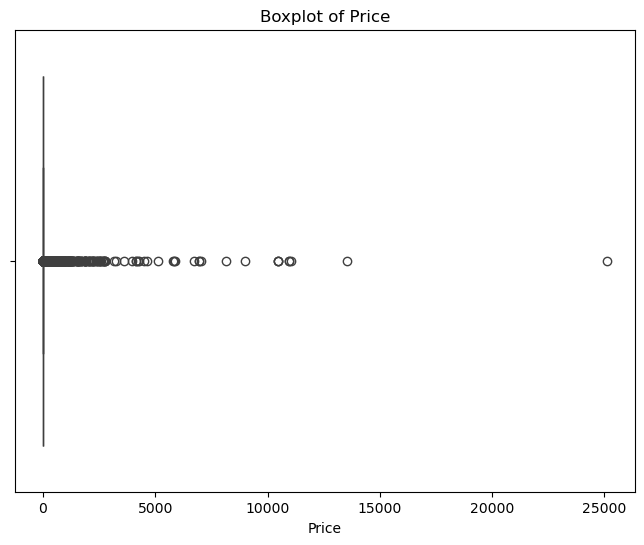

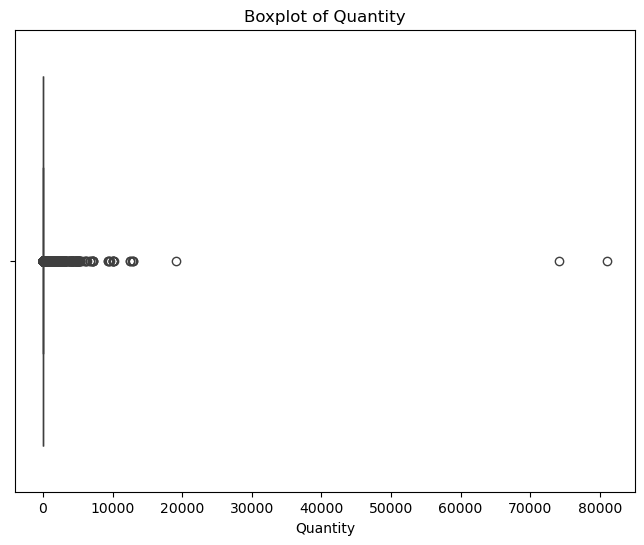

In [21]:
# Boxplot for Price
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price')
plt.show()

# Boxplot for Quantity
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

    Year  Month      Revenue
0   2009     12   822432.480
1   2010      1   650997.572
2   2010      2   551878.296
3   2010      3   830915.261
4   2010      4   678875.252
5   2010      5   657720.650
6   2010      6   749707.010
7   2010      7   648820.670
8   2010      8   695263.530
9   2010      9   921708.651
10  2010     10  1161915.980
11  2010     11  1464308.102
12  2010     12   821529.080
13  2011      1   689811.610
14  2011      2   522545.560
15  2011      3   716215.260
16  2011      4   536968.491
17  2011      5   769296.610
18  2011      6   760547.010
19  2011      7   718076.121
20  2011      8   757841.380
21  2011      9  1056435.192
22  2011     10  1151263.730
23  2011     11  1503866.780
24  2011     12   637808.330
Year        2009         2010         2011
Month                                     
1            NaN   650997.572   689811.610
2            NaN   551878.296   522545.560
3            NaN   830915.261   716215.260
4            NaN   678875.252  

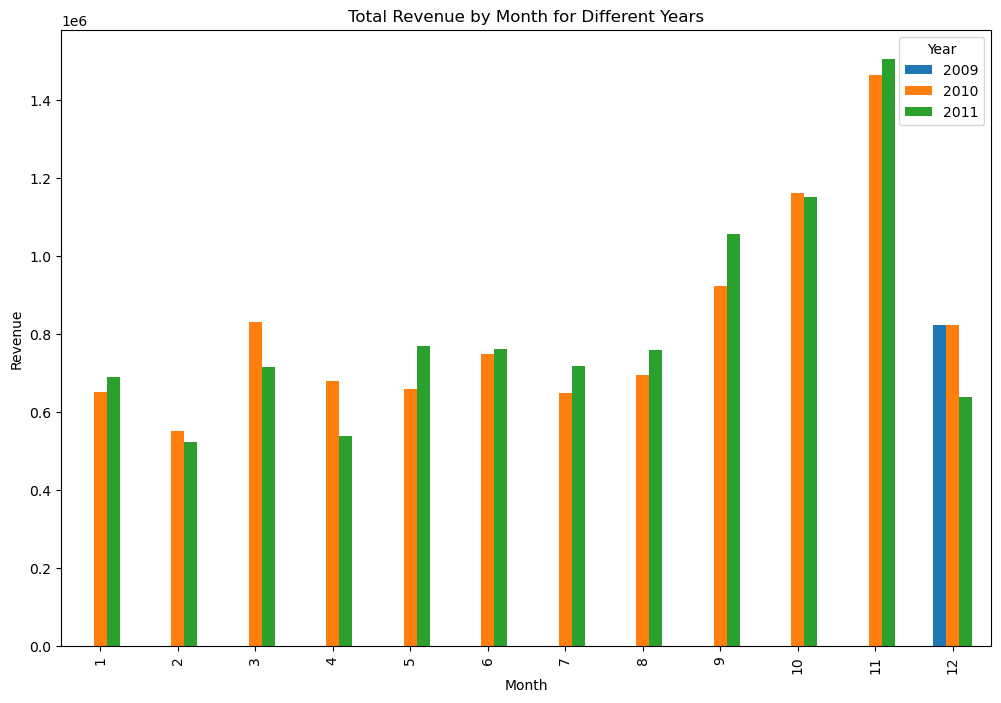

In [22]:
# Group by Year and Month to calculate total revenue
monthly_revenue = df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()
print(monthly_revenue)

# Pivot the table to make years as columns
monthly_revenue_pivot = monthly_revenue.pivot(index='Month', columns='Year', values='Revenue')
print(monthly_revenue_pivot)

import matplotlib.pyplot as plt

# Plot the graph
monthly_revenue_pivot.plot(kind='bar', figsize=(12, 8))
plt.title('Total Revenue by Month for Different Years')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Year')
plt.show()

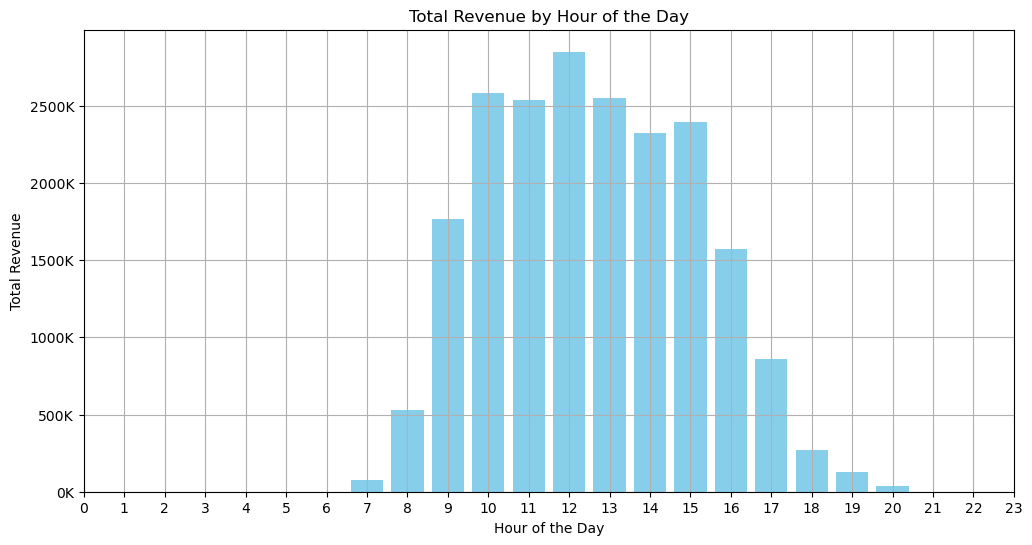

In [23]:
import matplotlib.ticker as ticker

# Calculate hourly revenue
hourly_revenue = df.groupby('Hour')['Revenue'].sum().reset_index()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(hourly_revenue['Hour'], hourly_revenue['Revenue'], color='skyblue')
plt.title('Total Revenue by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue')

# Format y-axis in thousands (K)
formatter = ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

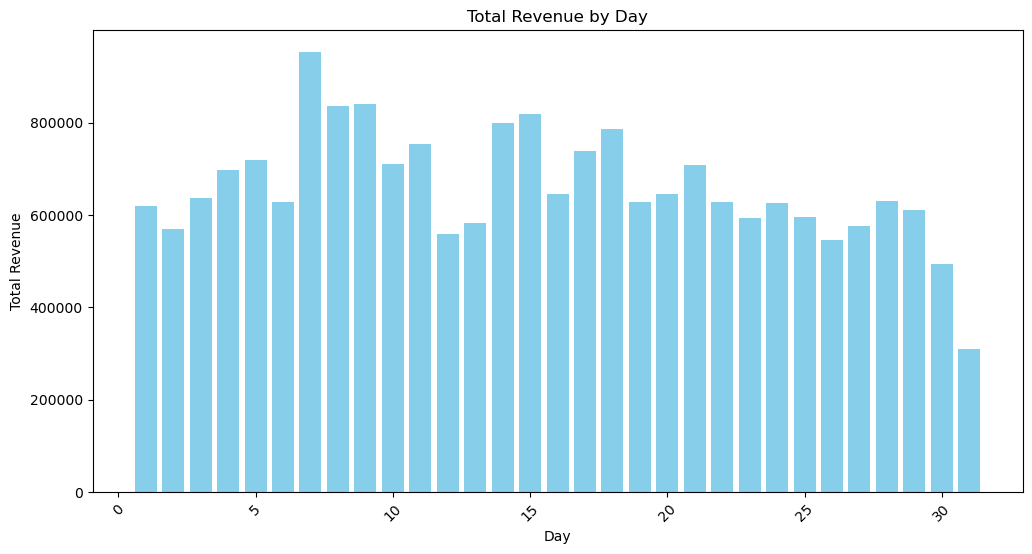

In [24]:
# Calculate daily revenue
daily_revenue = df.groupby('Day')['Revenue'].sum().reset_index()
daily_revenue.columns = ['Day', 'Revenue']

# Plot the graph
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(daily_revenue['Day'], daily_revenue['Revenue'], color='skyblue')
plt.title('Total Revenue by Day')
plt.xlabel('Day')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate day names for better readability
plt.show()

                 Country  Number of Customers  Percentage of Total
40        United Kingdom                 5354            90.622884
15               Germany                  107             1.811104
14                France                   96             1.624915
34                 Spain                   41             0.693974
3                Belgium                   29             0.490860
30              Portugal                   25             0.423155
36           Switzerland                   23             0.389303
26           Netherlands                   22             0.372376
35                Sweden                   20             0.338524
20                 Italy                   17             0.287745
0              Australia                   15             0.253893
13               Finland                   14             0.236967
1                Austria                   13             0.220041
28                Norway                   13             0.22

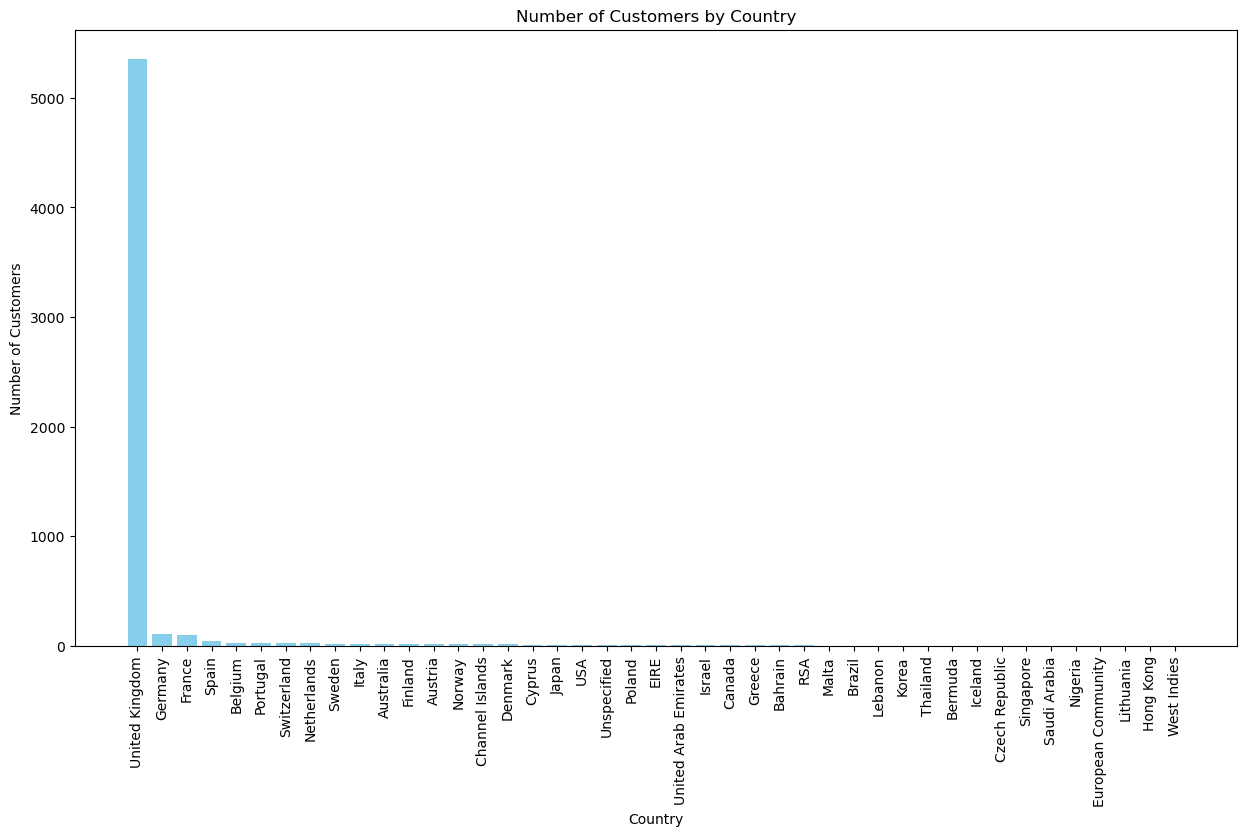

In [25]:
# Count unique customers in each country
customers_by_country = df.groupby('Country')['Customer ID'].nunique().reset_index()
customers_by_country.columns = ['Country', 'Number of Customers']

# Calculate the total number of unique customers
total_customers = customers_by_country['Number of Customers'].sum()

# Calculate the percentage of customers for each country
customers_by_country['Percentage of Total'] = (customers_by_country['Number of Customers'] / total_customers) * 100

# Sort by number of customers
customers_by_country = customers_by_country.sort_values(by='Number of Customers', ascending=False)

# Display the result
print(customers_by_country)

# Plot the graph
plt.figure(figsize=(15, 8))
plt.bar(customers_by_country['Country'], customers_by_country['Number of Customers'], color='skyblue')
plt.title('Number of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

                 Country       Revenue
40        United Kingdom  1.741059e+07
11                  EIRE  6.587809e+05
26           Netherlands  5.540381e+05
15               Germany  4.250197e+05
14                France  3.504561e+05
0              Australia  1.692835e+05
34                 Spain  1.083325e+05
36           Switzerland  1.006856e+05
35                Sweden  9.186982e+04
10               Denmark  6.858069e+04
3                Belgium  6.538782e+04
30              Portugal  5.636573e+04
28                Norway  5.632250e+04
7        Channel Islands  4.462333e+04
21                 Japan  4.302391e+04
20                 Italy  3.210817e+04
13               Finland  2.992554e+04
33             Singapore  2.531706e+04
8                 Cyprus  2.484995e+04
17             Hong Kong  2.368552e+04
1                Austria  2.361301e+04
16                Greece  1.909619e+04
19                Israel  1.132881e+04
39  United Arab Emirates  1.109763e+04
41           Unspecified 

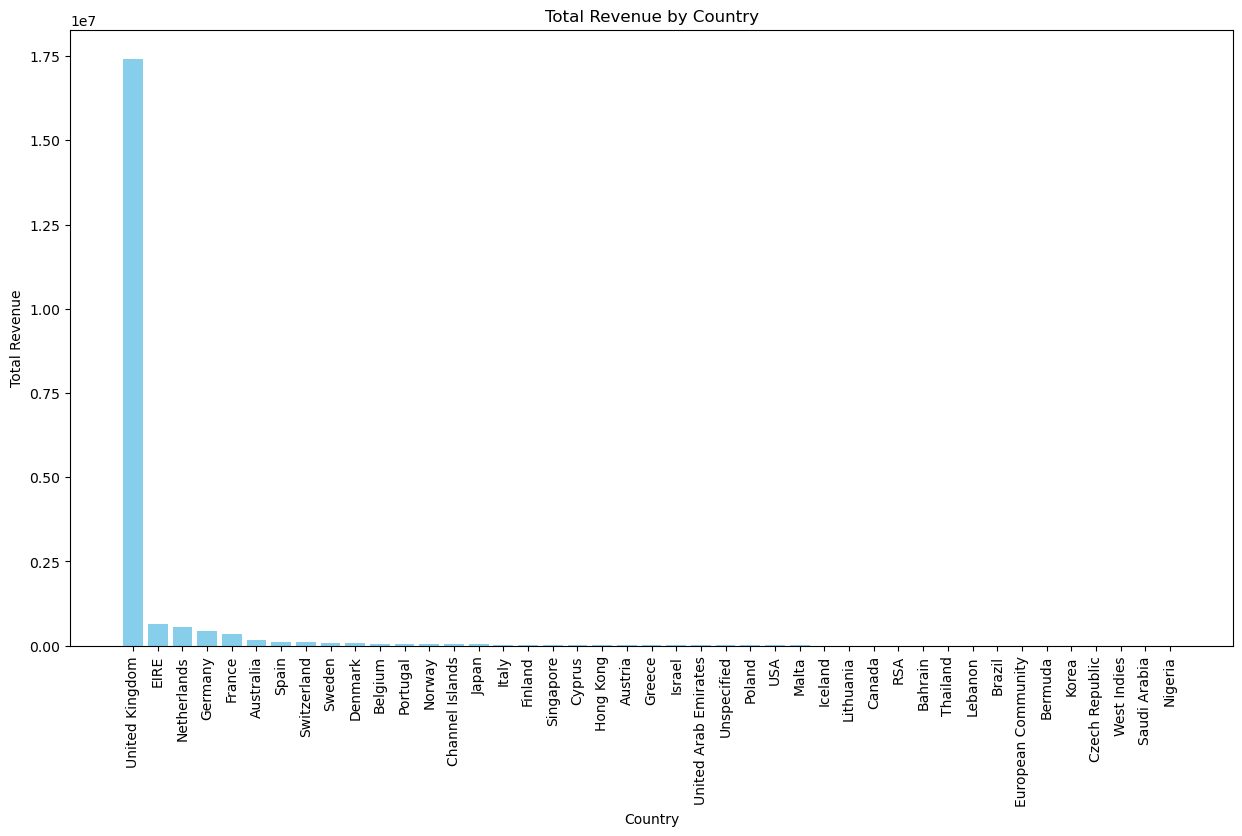

In [26]:
# Group by Country and calculate total revenue
revenue_by_country = df.groupby('Country')['Revenue'].sum().reset_index()

# Sort the revenue in descending order
revenue_by_country = revenue_by_country.sort_values(by='Revenue', ascending=False)

# Print the result
print(revenue_by_country)


import matplotlib.pyplot as plt

# Plot the graph
plt.figure(figsize=(15, 8))
plt.bar(revenue_by_country['Country'], revenue_by_country['Revenue'], color='skyblue')
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

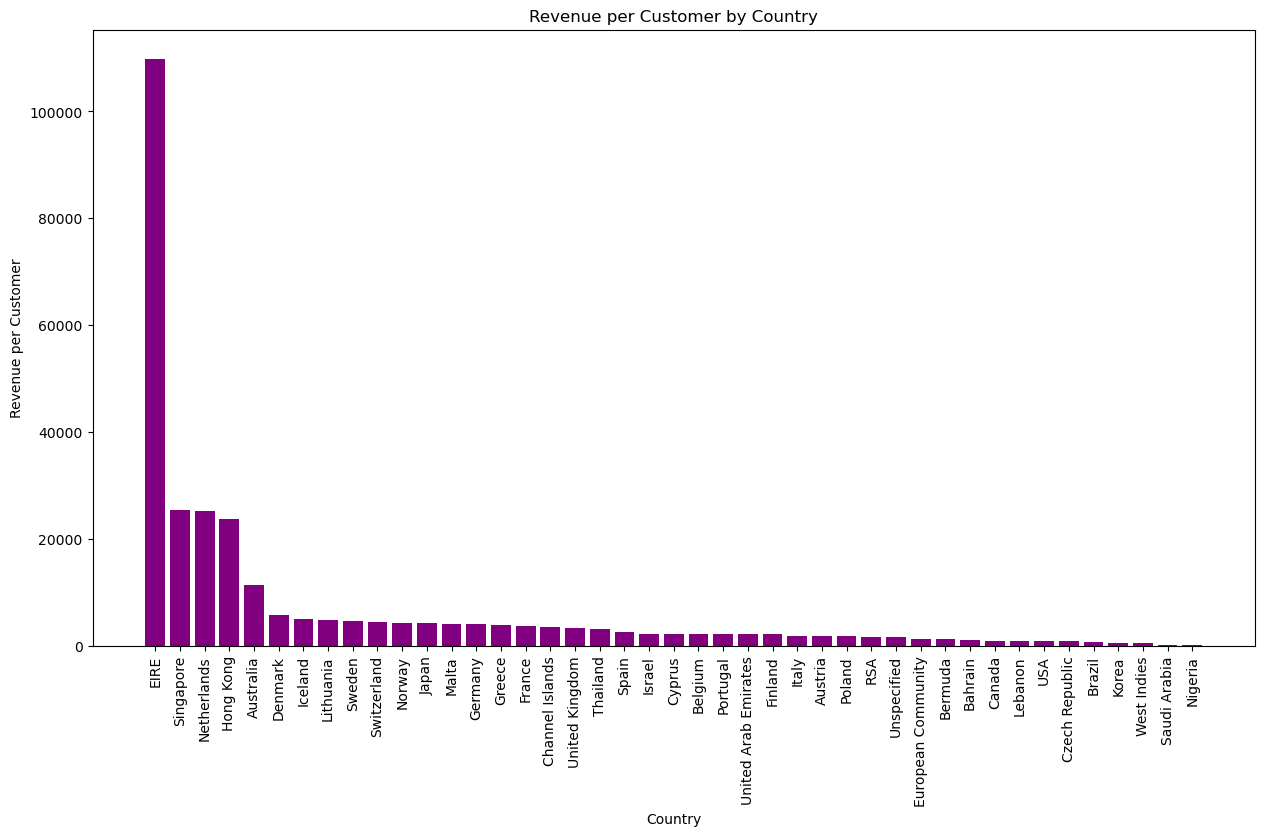

In [27]:
# Calculate total revenue per country
total_revenue = df.groupby('Country')['Revenue'].sum().reset_index()

# Calculate the number of unique customers per country
unique_customers = df.groupby('Country')['Customer ID'].nunique().reset_index()

# Merge both dataframes
revenue_per_customer = total_revenue.merge(unique_customers, on='Country')

# Calculate revenue per customer
revenue_per_customer['Revenue per Customer'] = revenue_per_customer['Revenue'] / revenue_per_customer['Customer ID']

# Sort by revenue per customer in descending order
revenue_per_customer = revenue_per_customer.sort_values(by='Revenue per Customer', ascending=False)

# Rename columns for clarity
revenue_per_customer.rename(columns={'Customer ID': 'Number of Customers'}, inplace=True)

# Plot the graph
plt.figure(figsize=(15, 8))
plt.bar(revenue_per_customer['Country'], revenue_per_customer['Revenue per Customer'], color='purple')
plt.title('Revenue per Customer by Country')
plt.xlabel('Country')
plt.ylabel('Revenue per Customer')
plt.xticks(rotation=90)
plt.show()

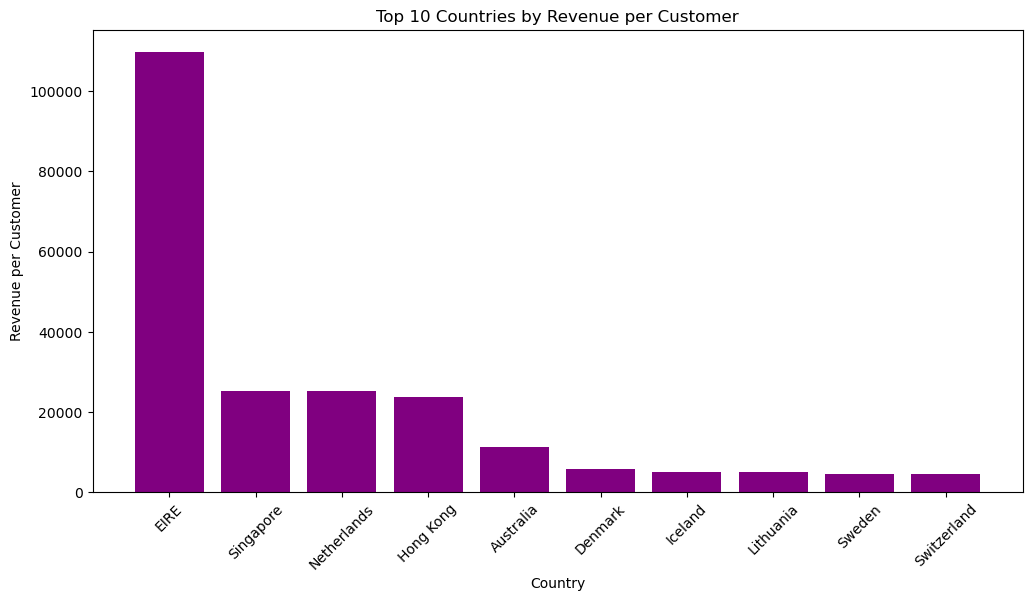

In [28]:
# Select the top 10 countries by revenue per customer
top_10_revenue_per_customer = revenue_per_customer.head(10)

# If you want to sort by revenue per customer in descending order
top_10_revenue_per_customer = revenue_per_customer.sort_values(by='Revenue per Customer', ascending=False).head(10)


# Plot the graph for top 10 countries
plt.figure(figsize=(12, 6))
plt.bar(top_10_revenue_per_customer['Country'], top_10_revenue_per_customer['Revenue per Customer'], color='purple')
plt.title('Top 10 Countries by Revenue per Customer')
plt.xlabel('Country')
plt.ylabel('Revenue per Customer')
plt.xticks(rotation=45)
plt.show()

StockCode  Description                       
M          Manual                                339599.81
22423      REGENCY CAKESTAND 3 TIER              330590.32
DOT        DOTCOM POSTAGE                        309854.11
85123A     WHITE HANGING HEART T-LIGHT HOLDER    257541.10
23843      PAPER CRAFT , LITTLE BIRDIE           168469.60
47566      PARTY BUNTING                         148318.28
85099B     JUMBO BAG RED RETROSPOT               145961.83
84879      ASSORTED COLOUR BIRD ORNAMENT         129324.49
POST       POSTAGE                               125682.42
22086      PAPER CHAIN KIT 50'S CHRISTMAS        117760.29
Name: Revenue, dtype: float64


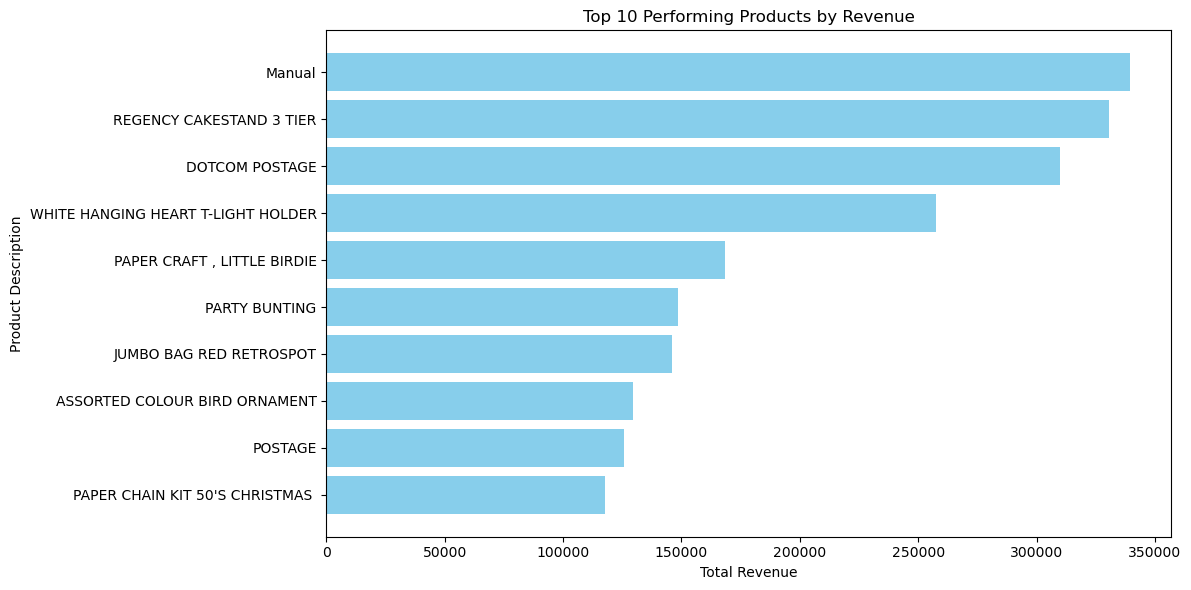

In [29]:
# Group by 'StockCode' and 'Description', and sum the 'Revenue'
product_revenue = df.groupby(['StockCode', 'Description'])['Revenue'].sum()

# Sort the products by total revenue in descending order
sorted_revenue = product_revenue.sort_values(ascending=False)

# Get the top 10 performing products by revenue
top_10_revenue_products = sorted_revenue.head(10)

# Display the result
print(top_10_revenue_products)

# Convert the result to a DataFrame for better plotting
top_10_revenue_products_df = top_10_revenue_products.reset_index()
top_10_revenue_products_df.columns = ['StockCode', 'Description', 'Total Revenue']

# Plot the top 10 products by revenue
plt.figure(figsize=(12, 6))
plt.barh(top_10_revenue_products_df['Description'], top_10_revenue_products_df['Total Revenue'], color='skyblue')
plt.title('Top 10 Performing Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.gca().invert_yaxis()  # Invert y-axis to show highest revenue at the top
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

StockCode  Description                       
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     106250.0
85123A     WHITE HANGING HEART T-LIGHT HOLDER     94147.0
23843      PAPER CRAFT , LITTLE BIRDIE            80995.0
84879      ASSORTED COLOUR BIRD ORNAMENT          80090.0
23166      MEDIUM CERAMIC TOP STORAGE JAR         78033.0
85099B     JUMBO BAG RED RETROSPOT                77286.0
17003      BROCADE RING PURSE                     70379.0
21977      PACK OF 60 PINK PAISLEY CAKE CASES     56061.0
84991      60 TEATIME FAIRY CAKE CASES            54030.0
22197      SMALL POPCORN HOLDER                   48597.0
Name: Quantity, dtype: float64


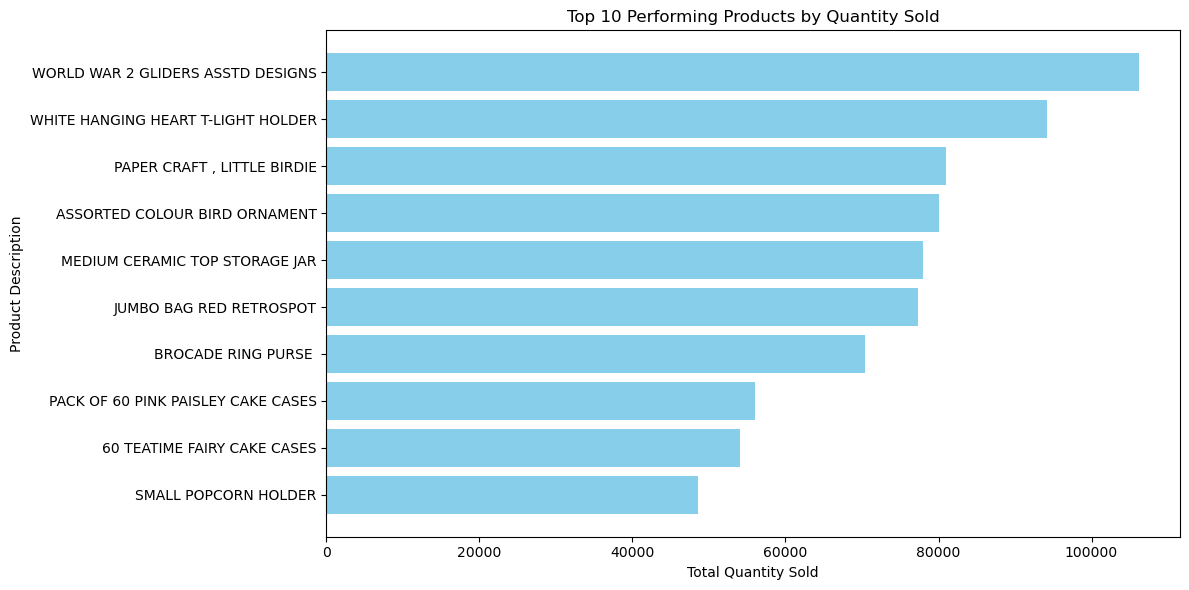

In [30]:
# Group by 'StockCode' and 'Description', and sum the 'Quantity'
product_quantity = df.groupby(['StockCode', 'Description'])['Quantity'].sum()

# Sort the products by total quantity in descending order
sorted_quantity = product_quantity.sort_values(ascending=False)

# Get the top 10 performing products by quantity sold
top_10_quantity_products = sorted_quantity.head(10)

# Display the result
print(top_10_quantity_products)
 
# Convert to a DataFrame for easier plotting
top_10_quantity_products_df = top_10_quantity_products.reset_index()
top_10_quantity_products_df.columns = ['StockCode', 'Description', 'Total Quantity']

# Plot the top 10 products
plt.figure(figsize=(12, 6))
plt.barh(top_10_quantity_products_df['Description'], top_10_quantity_products_df['Total Quantity'], color='skyblue')
plt.title('Top 10 Performing Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest quantity at the top
plt.tight_layout()
plt.show()

   Customer ID         Country  Total Revenue
0      18102.0  United Kingdom      580987.04
1      14646.0     Netherlands      528602.52
2      14156.0            EIRE      313440.77
3      14911.0            EIRE      291431.21
4      17450.0  United Kingdom      244784.25
5      13694.0  United Kingdom      195483.15
6      17511.0  United Kingdom      172132.87
7      16446.0  United Kingdom      168472.50
8      16684.0  United Kingdom      147142.77
9      12415.0       Australia      144458.37


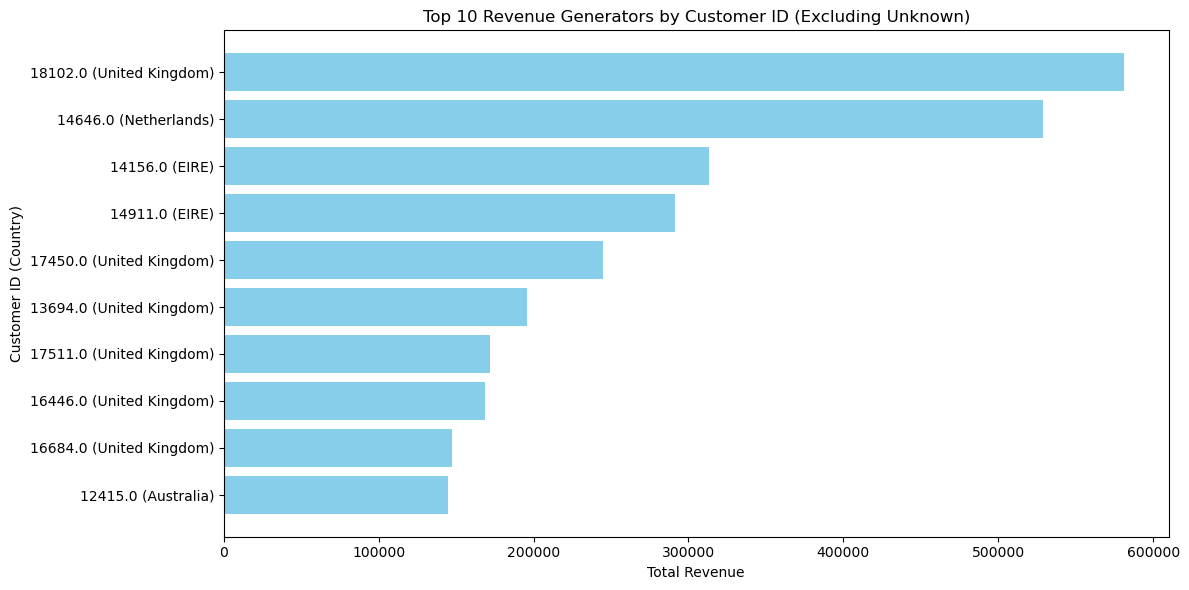

In [31]:
# Exclude 'Unknown' from the 'Customer ID'
filtered_df = df[df['Customer ID'] != 'Unknown']

# Group by 'Customer ID' and 'Country', and sum the 'Revenue'
customer_revenue = filtered_df.groupby(['Customer ID', 'Country'])['Revenue'].sum()

# Sort the customers by total revenue in descending order
sorted_customer_revenue = customer_revenue.sort_values(ascending=False)

# Get the top 10 revenue generators
top_10_customers = sorted_customer_revenue.head(10)

# Convert to a DataFrame for easier visualization
top_10_customers_df = top_10_customers.reset_index()
top_10_customers_df.columns = ['Customer ID', 'Country', 'Total Revenue']

# Display the top 10 customers
print(top_10_customers_df)

# Plot the top 10 customers by revenue
plt.figure(figsize=(12, 6))
plt.barh(
    top_10_customers_df['Customer ID'].astype(str) + ' (' + top_10_customers_df['Country'] + ')',
    top_10_customers_df['Total Revenue'],
    color='skyblue'
)
plt.title('Top 10 Revenue Generators by Customer ID (Excluding Unknown)')
plt.xlabel('Total Revenue')
plt.ylabel('Customer ID (Country)')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest revenue at the top
plt.tight_layout()
plt.show()

In [32]:
#Customer Segmentation

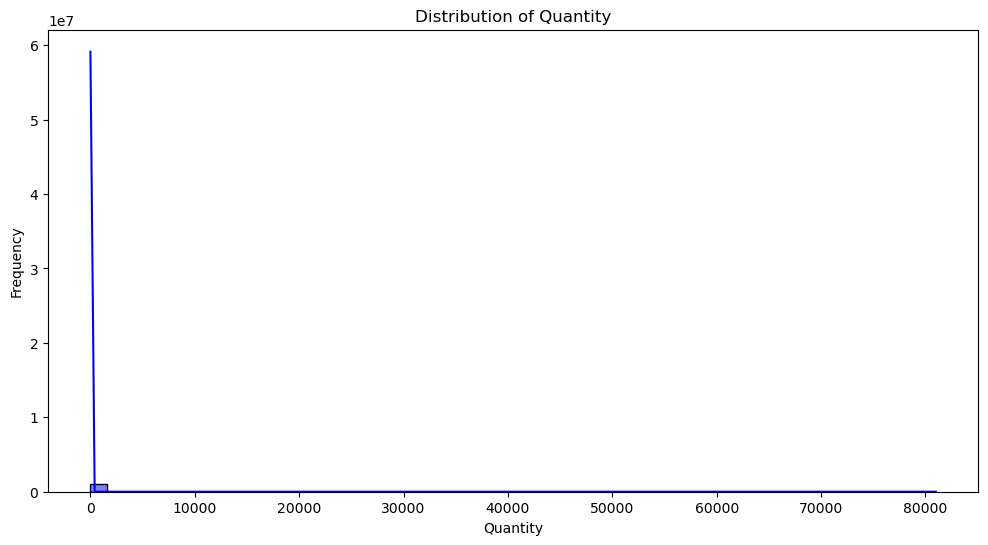

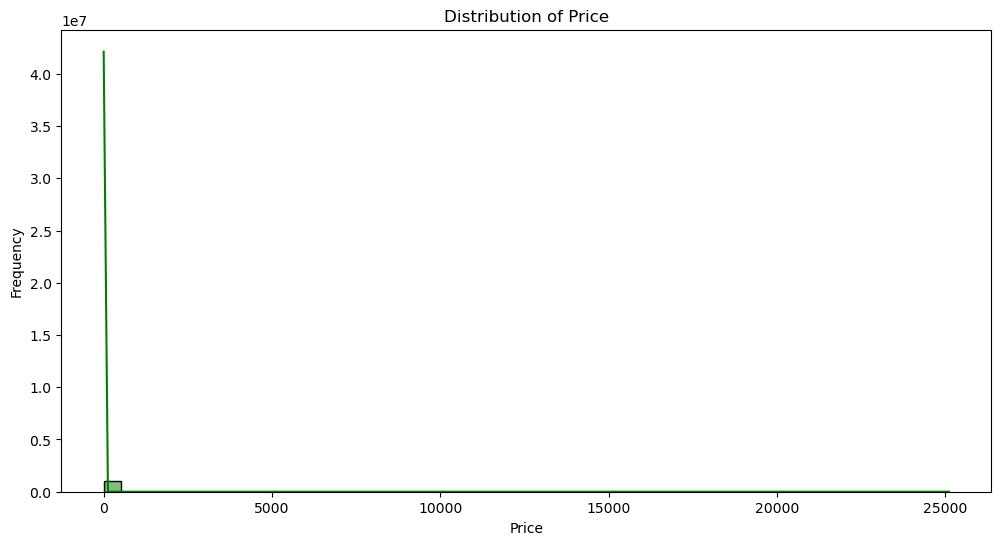

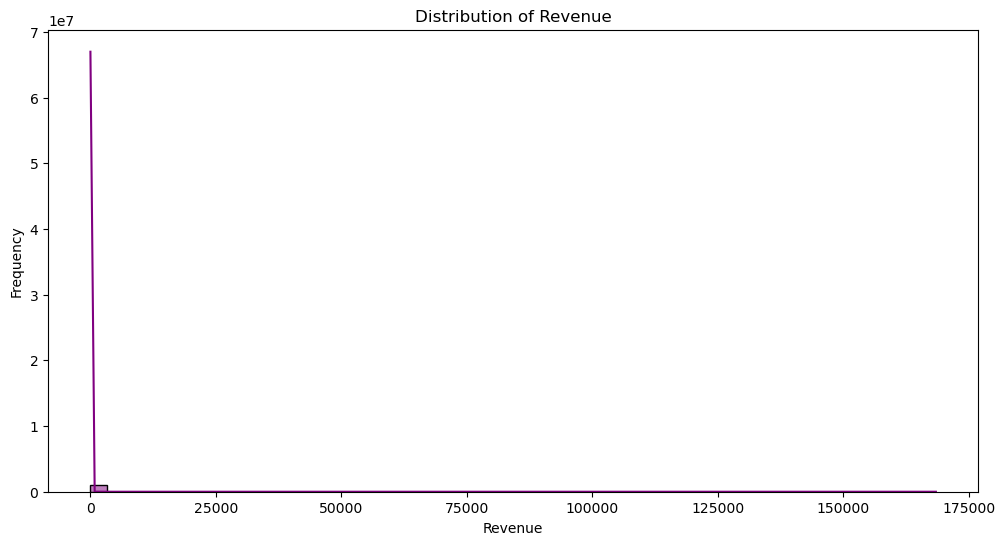

In [33]:
# Summary statistics for key metrics
eda_summary = df[['Quantity', 'Price', 'Revenue']].describe()

# Visualize distributions of Quantity, Price, and Revenue
plt.figure(figsize=(12, 6))
sns.histplot(df['Quantity'], bins=50, kde=True, color='blue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=50, kde=True, color='green')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Revenue'], bins=50, kde=True, color='purple')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

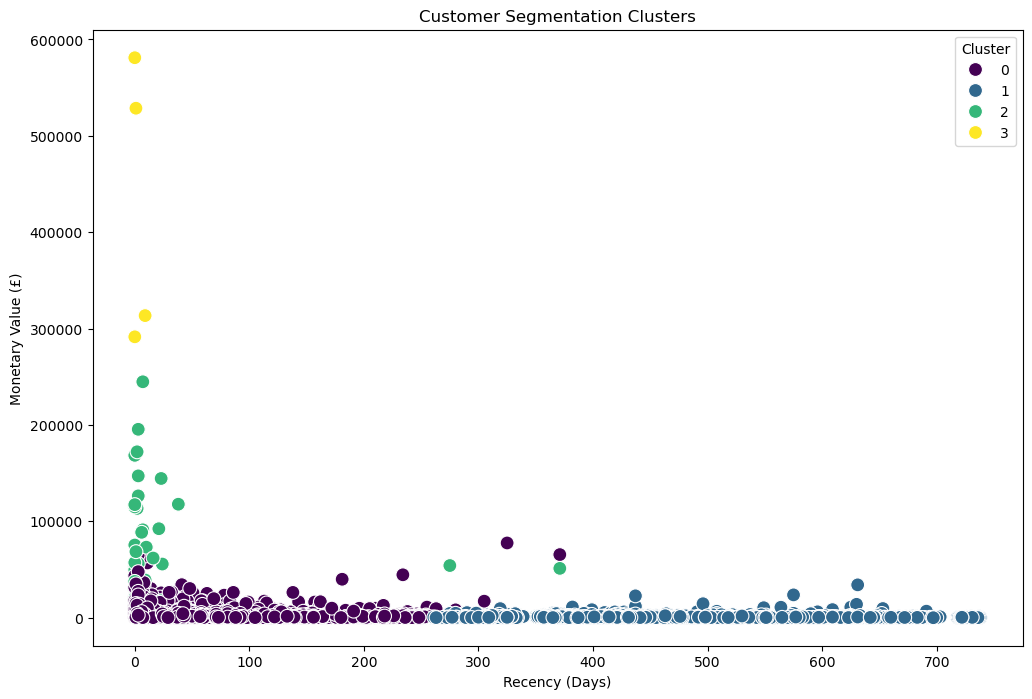

(             Recency  Frequency  Monetary  Cluster
 Customer ID                                       
 12346.0          325         12  77556.46        0
 12347.0            1          8   4921.53        0
 12348.0           74          5   2019.40        0
 12349.0           18          4   4428.69        0
 12350.0          309          1    334.40        1,
             Recency   Frequency       Monetary
 Cluster                                       
 0         66.096875    7.267708    2920.168751
 1        462.324162    2.207104     747.116260
 2         23.263158  100.157895   77724.313474
 3          2.500000  212.750000  428615.385000)

In [35]:
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with Customer ID as 'Unknown'
df_filtered = df[df['Customer ID'] != 'Unknown']

# Define the reference date for recency calculation
reference_date = df_filtered['InvoiceDate'].max()

# Compute RFM metrics
rfm = df_filtered.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'Invoice': 'nunique',  # Frequency
    'Revenue': 'sum'       # Monetary Value
}).rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'Revenue': 'Monetary'})

# Standardize the RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyze cluster characteristics
cluster_summary = rfm.groupby('Cluster').mean()

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Cluster'], palette='viridis', s=100
)
plt.title("Customer Segmentation Clusters")
plt.xlabel("Recency (Days)")
plt.ylabel("Monetary Value (£)")
plt.legend(title='Cluster')
plt.show()

rfm.head(), cluster_summary


In [36]:
# Detailed analysis of clusters
detailed_cluster_analysis = rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'median', 'std'],
    'Frequency': ['mean', 'median', 'std'],
    'Monetary': ['mean', 'median', 'std'],
    'Cluster': 'count'  # Number of customers in each cluster
}).rename(columns={'Cluster': 'Customer Count'})

# Rename columns for clarity
detailed_cluster_analysis.columns = [
    'Recency Mean', 'Recency Median', 'Recency Std',
    'Frequency Mean', 'Frequency Median', 'Frequency Std',
    'Monetary Mean', 'Monetary Median', 'Monetary Std',
    'Customer Count'
]

# Sort by Monetary Mean for better insights
detailed_cluster_analysis = detailed_cluster_analysis.sort_values(by='Monetary Mean', ascending=False)

# Display the dataframe in the notebook
detailed_cluster_analysis

,Recency Mean,Recency Median,Recency Std,Frequency Mean,Frequency Median,Frequency Std,Monetary Mean,Monetary Median,Monetary Std,Customer Count
Cluster,,,,,,,,,,
3,2.500000,0.5,4.358899,212.750000,154.0,123.583642,428615.385000,421021.645,147534.445948,4
2,23.263158,3.0,73.026720,100.157895,80.5,63.358494,77724.313474,56646.885,55920.060300,38
0,66.096875,40.0,67.939729,7.267708,5.0,8.027058,2920.168751,1328.210,4921.945607,3840
1,462.324162,429.0,127.227378,2.207104,1.0,2.423221,747.116260,371.510,1520.256727,1999


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Ensure 'Customer ID' is filtered and 'InvoiceDate' is in datetime format
df_filtered = df[df['Customer ID'] != 'Unknown']
df_filtered['InvoiceDate'] = pd.to_datetime(df_filtered['InvoiceDate'])

# Compute RFM metrics
rfm = df_filtered.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (df_filtered['InvoiceDate'].max() - x.max()).days,  # Recency
    'Invoice': 'nunique',  # Frequency
    'Revenue': 'sum'       # Monetary Value
}).rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'Revenue': 'Monetary'})

# Reset index to include Customer ID as a column
rfm_metrics = rfm.reset_index()[['Customer ID', 'Recency', 'Frequency']]

# Ensure 'Customer ID' is of type string for merging compatibility
df_filtered['Customer ID'] = df_filtered['Customer ID'].astype(str)
rfm_metrics['Customer ID'] = rfm_metrics['Customer ID'].astype(str)

# Handle missing values in Customer ID and merge with RFM metrics
predictive_data = df_filtered[['Quantity', 'Price', 'Revenue', 'Customer ID']].copy()
predictive_data.dropna(subset=['Customer ID'], inplace=True)  # Remove rows with missing Customer ID
predictive_data = predictive_data.merge(rfm_metrics, on='Customer ID', how='left')

# Print dataset details for verification
print("Columns in filtered dataset:", df_filtered.columns)
print("Columns in RFM metrics:", rfm_metrics.columns)
print("Data types:")
print("Customer ID in df_filtered:", df_filtered['Customer ID'].dtype)
print("Customer ID in rfm_metrics:", rfm_metrics['Customer ID'].dtype)

# Define features (X) and target (y)
X = predictive_data[['Quantity','Recency', 'Frequency']]
y = predictive_data['Revenue']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Coefficients for feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Output results
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")
print("\nFeature Importance:")
print(feature_importance)


C:\Users\pramo\AppData\Local\Temp\ipykernel_5560\24309563.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['InvoiceDate'] = pd.to_datetime(df_filtered['InvoiceDate'])
C:\Users\pramo\AppData\Local\Temp\ipykernel_5560\24309563.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Customer ID'] = df_filtered['Customer ID'].astype(str)


Columns in filtered dataset: Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Year', 'Month', 'Day', 'Hour',
       'Revenue'],
      dtype='object')
Columns in RFM metrics: Index(['Customer ID', 'Recency', 'Frequency'], dtype='object')
Data types:
Customer ID in df_filtered: object
Customer ID in rfm_metrics: object
RMSE: 76.70482026071966
R² Score: -0.3971380229959882

Feature Importance:
     Feature  Coefficient
0   Quantity     1.308647
2  Frequency     0.020178
1    Recency    -0.012862


C:\Users\pramo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
pip install xgboost

In [45]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,  # Number of trees
    max_depth=6,       # Maximum tree depth
    learning_rate=0.1, # Step size shrinkage
    subsample=0.8,     # Fraction of samples used per tree
    random_state=42    # Seed for reproducibility
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Output results
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R² Score: {r2_xgb}")

XGBoost RMSE: 48.06085894420074
XGBoost R² Score: 0.4514994651537617


C:\Users\pramo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [46]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

     Feature  Importance
0   Quantity    0.820195
1    Recency    0.165776
2  Frequency    0.014029


In [47]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost Regressor
xgb = XGBRegressor(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter combinations to try
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    random_state=42,
    verbose=1,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

# Best parameters and model performance
best_params = random_search.best_params_
best_xgb = random_search.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)
rmse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned, squared=False)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

# Output results
print(f"Best Parameters: {best_params}")
print(f"Tuned XGBoost RMSE: {rmse_xgb_tuned}")
print(f"Tuned XGBoost R² Score: {r2_xgb_tuned}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Tuned XGBoost RMSE: 44.64336843307316
Tuned XGBoost R² Score: 0.5267311615836157


C:\Users\pramo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


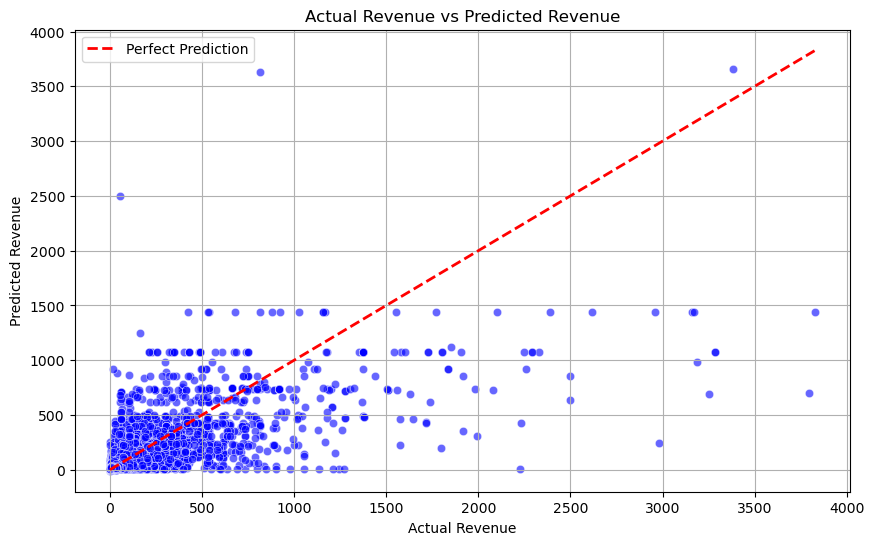

In [48]:
# Create a DataFrame for actual vs predicted values
results_df = pd.DataFrame({
    'Actual Revenue': y_test,
    'Predicted Revenue': y_pred_xgb_tuned
})

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Revenue', y='Predicted Revenue', data=results_df, alpha=0.6, color='blue')

# Add a reference line (y = x) for perfect predictions
plt.plot([results_df['Actual Revenue'].min(), results_df['Actual Revenue'].max()],
         [results_df['Actual Revenue'].min(), results_df['Actual Revenue'].max()],
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Customize the plot
plt.title('Actual Revenue vs Predicted Revenue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.legend()
plt.grid(True)
plt.show()


     Feature  Importance
0   Quantity    0.738026
1    Recency    0.253435
2  Frequency    0.008539


C:\Users\pramo\AppData\Local\Temp\ipykernel_5560\645964471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


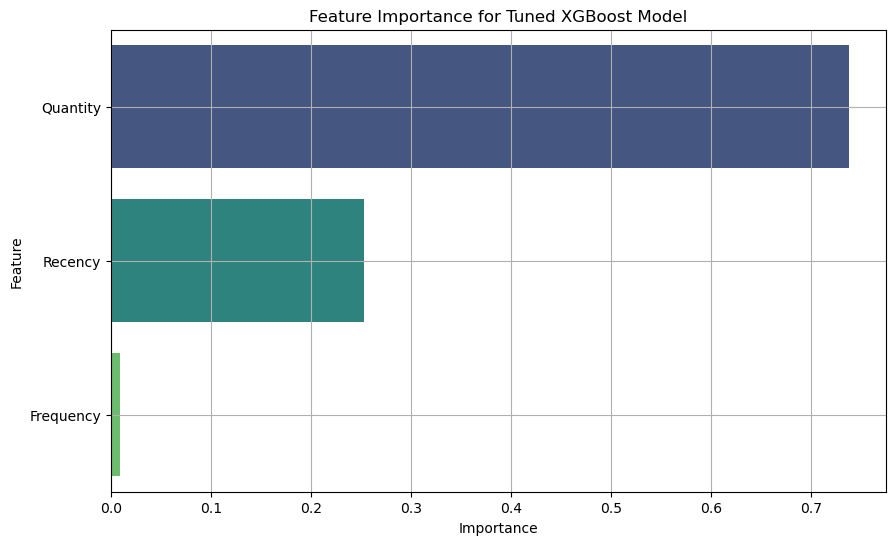

In [49]:
# Extract feature importance
importances = best_xgb.feature_importances_
features = X_train.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)

# Plot feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance for Tuned XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()
